# Notebook 09 - Pandas

https://pandas.pydata.org/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline 

We've learned about multiple data structures (lists, numpy arrays etc.)

Today we will introduce a few new data structures which are contained with the Pandas python library for data analysis. 

Pandas Series (series of data)

Pandas DataFrame (tabular data)


### Pandas Series


In [2]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994])

In [3]:
s

0    77134
1    76424
2    33104
3    13441
4    36505
5    29176
6    34994
dtype: int64

The series object we introduced above contains elements of type int64 and is indexed by integers 0-6

The series object has index and values attributes which allow you to extract the indeces and values separately:

In [4]:
s.index

RangeIndex(start=0, stop=7, step=1)

In [5]:
s.values

array([77134, 76424, 33104, 13441, 36505, 29176, 34994])

In [6]:
s[0:2]

0    77134
1    76424
dtype: int64

In [7]:
s[3]

13441

Series in pandas allow you to use a more descriptive index

For example, the numbers listed above could be the poppulations of Indiana towns. Therefore we can assign the index attribute of a the Series object to a list with the names of these towns as the index.

In [8]:
s.index = ["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [9]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
dtype: int64

In [10]:
s["Crown Point"]

29176

In [11]:
s.Merrillville

34994

In [12]:
s[4]

36505

We can also give a descriptive ame to the Series object name attribute:

In [13]:
s.name = "Population"

In [14]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

We could of done all of this at once:

In [15]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994], name="Population",index=["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [16]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

We could of done this with numpy arrays but we would have had to stick with integer indeces:


In [17]:
pop = np.array([77134,76424,33104,13441,36505,29176,34994])
town = np.array(["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [18]:
print("The population of",town[2],"is",pop[2])


The population of Valaraiso is 33104


As you can see pandas Series can be a more convenient container for storying one-dimensinal arrays

You can give a series objects mutliple indeces and it will return a new Series object which is a subset of the original



In [19]:
r = s[["Chesterton","Portage"]]
r

Chesterton    13441
Portage       36505
Name: Population, dtype: int64

There are built in statistical methods:

In [20]:
s.median()

34994.0

In [21]:
s.mean()

42968.28571428572

In [22]:
s.std()

24328.775916010007

In [23]:
s.min()

13441

In [24]:
s.max()

77134

And there is a built in method to give a summary of all of the statisics:

In [25]:
s.describe()

count        7.000000
mean     42968.285714
std      24328.775916
min      13441.000000
25%      31140.000000
50%      34994.000000
75%      56464.500000
max      77134.000000
Name: Population, dtype: float64

The pandas Series interfaces with pyplot:

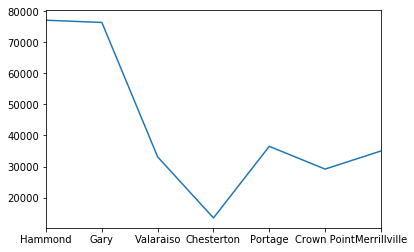

In [26]:
s.plot()

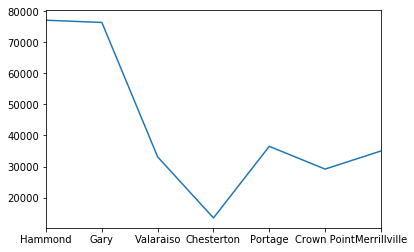

In [27]:
s.plot(kind="line")

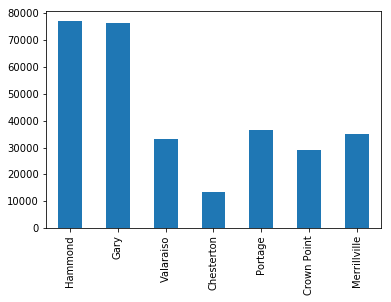

In [28]:
s.plot(kind="bar")

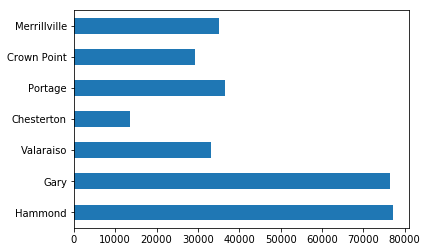

In [29]:
s.plot(kind="barh")

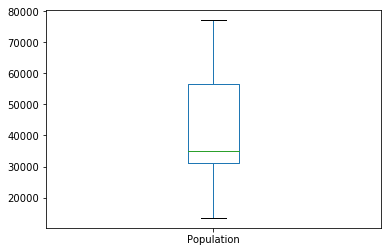

In [30]:
s.plot(kind="box")
# red median
# box 1st quartile - 3rd quartile
# black lines give the max and min values

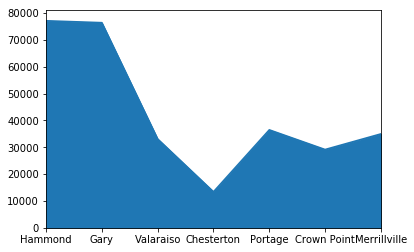

In [31]:
s.plot(kind="area")

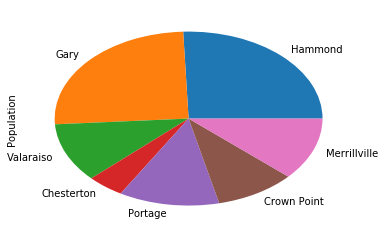

In [32]:
s.plot(kind="pie")

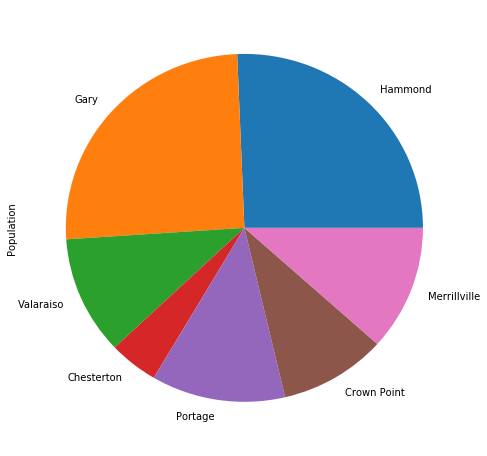

In [33]:
plt.rcParams['figure.figsize'] = 8, 8
s.plot(kind="pie")

Pandas Series behaives like a numpy array

In [34]:
s[2]

33104

In [35]:
s[0:2]

Hammond    77134
Gary       76424
Name: Population, dtype: int64

In [36]:
s[2:]

Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [37]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [38]:
s.median()

34994.0

In [39]:
s[ s > s.median()]

Hammond    77134
Gary       76424
Portage    36505
Name: Population, dtype: int64

In [40]:
s.mean()

42968.28571428572

In [41]:
s[ s > s.mean()]

Hammond    77134
Gary       76424
Name: Population, dtype: int64

In [42]:
s[[4,3,2]]

Portage       36505
Chesterton    13441
Valaraiso     33104
Name: Population, dtype: int64

In [43]:
np.cos(s)

Hammond        -0.046356
Gary           -0.046296
Valaraiso      -0.507764
Chesterton      0.299500
Portage         0.953355
Crown Point    -0.999579
Merrillville   -0.979954
Name: Population, dtype: float64

Series also behave like dictionaries

In [44]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [45]:
d['type']

'canned'

In [46]:
s['Gary']

76424

In [47]:
#s['gary']

In [48]:
'Portage' in s

True

In [49]:
'portage' in s

False

In [50]:
'Chicago' in s

False

In [51]:
s + s

Hammond         154268
Gary            152848
Valaraiso        66208
Chesterton       26882
Portage          73010
Crown Point      58352
Merrillville     69988
Name: Population, dtype: int64

In [52]:
s*500

Hammond         38567000
Gary            38212000
Valaraiso       16552000
Chesterton       6720500
Portage         18252500
Crown Point     14588000
Merrillville    17497000
Name: Population, dtype: int64

In [53]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [54]:
s[2:]

Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [55]:
s[:-2]

Hammond       77134
Gary          76424
Valaraiso     33104
Chesterton    13441
Portage       36505
Name: Population, dtype: int64

In [56]:
s[2:]+ s[:-2]

Chesterton      26882.0
Crown Point         NaN
Gary                NaN
Hammond             NaN
Merrillville        NaN
Portage         73010.0
Valaraiso       66208.0
Name: Population, dtype: float64

In [57]:
q = pd.Series([77134], name="Population",index=["Hammond"])

In [58]:
s+q

Chesterton           NaN
Crown Point          NaN
Gary                 NaN
Hammond         154268.0
Merrillville         NaN
Portage              NaN
Valaraiso            NaN
Name: Population, dtype: float64

In [59]:
s.dot(s) # dot product

16475251066

Adding unaligned Series will form the union of the indexes involve (if a label is not found for one of the series it will return NaN). In some cases this makes life easier than when working with numpy arrays.

In [60]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [61]:
s.name = "Npeople"

In [62]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Npeople, dtype: int64

In [63]:
# copy a Series but give it a different name
s2 = s.rename("CountPeople")

In [64]:
s

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Npeople, dtype: int64

In [65]:
s2

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: CountPeople, dtype: int64

### Pandas DataFrame

Series were good for 1-D arrays, the Series DataFrame object is good for higher dimensional arrays (it can be viewed as a collection of Series objects with a common index)

There are multiple ways to initialize a DataFrame

In [66]:
# Pass a nested list then label the indeces and columns:
df = pd.DataFrame([
    [77134,  "Lake",31.3],
    [76424,  "Lake",28.5],
    [33104,"Porter",34.1],
    [13441,"Porter",31.2],
    [36505,"Porter",30.3],
    [29176,  "Lake",35.3],
    [34994,  "Lake",33.8]
])


In [67]:
df

,0,1,2
0,77134,Lake,31.3
1,76424,Lake,28.5
2,33104,Porter,34.1
3,13441,Porter,31.2
4,36505,Porter,30.3
5,29176,Lake,35.3
6,34994,Lake,33.8


In [68]:
df.index = ["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [69]:
df

,0,1,2
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valaraiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [70]:
# Label the columns
df.columns = ["Population","County","Mean Age"]

In [71]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valaraiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [72]:
# Pass a nested list and label the indeces and columns all at once:
df = pd.DataFrame(
    [
        [77134,  "Lake",31.3],
        [76424,  "Lake",28.5],
        [33104,"Porter",34.1],
        [13441,"Porter",31.2],
        [36505,"Porter",30.3],
        [29176,  "Lake",35.3],
        [34994,  "Lake",33.8]
    ],
    index = ["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"],
    columns = ["Population","County","Mean Age"]
)


In [73]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valaraiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


Alernative method: Setup the DataFrame witha  python dictionary
    
Recall:    
    
Dictionaries are not sequences like lists and tuples (there is no positional ordering).

Instead, objects are stored by "key" (the object is mapped to the key)

Dictionaries are mutable (they can be modified, grow, and shrink)


In [74]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [75]:
d['food']

'Beans'

One can create a dataframe from a dictionary, with the dictionary keys turning into the column names

In [76]:
df2 = pd.DataFrame(
    {
        "Population": [77134,76424,33104,13441,36505,29176,34994],
        "County": ["Lake", "Lake", "Porter", "Porter", "Porter", "Lake", "Lake"] ,
        "Mean age": [31.3, 28.5, 34.1, 31.2, 30.3, 35.3, 33.8]
    },
    index=["Hammond", "Gary", "Valaraiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]
)

In [77]:
df2

,County,Mean age,Population
Hammond,Lake,31.3,77134
Gary,Lake,28.5,76424
Valaraiso,Porter,34.1,33104
Chesterton,Porter,31.2,13441
Portage,Porter,30.3,36505
Crown Point,Lake,35.3,29176
Merrillville,Lake,33.8,34994


In [78]:
df2.values # return an array

array([['Lake', 31.3, 77134],
       ['Lake', 28.5, 76424],
       ['Porter', 34.1, 33104],
       ['Porter', 31.2, 13441],
       ['Porter', 30.3, 36505],
       ['Lake', 35.3, 29176],
       ['Lake', 33.8, 34994]], dtype=object)

In [79]:
df2.index

Index(['Hammond', 'Gary', 'Valaraiso', 'Chesterton', 'Portage', 'Crown Point',
       'Merrillville'],
      dtype='object')

In [80]:
df2.columns

Index(['County', 'Mean age', 'Population'], dtype='object')

In [81]:
df2

,County,Mean age,Population
Hammond,Lake,31.3,77134
Gary,Lake,28.5,76424
Valaraiso,Porter,34.1,33104
Chesterton,Porter,31.2,13441
Portage,Porter,30.3,36505
Crown Point,Lake,35.3,29176
Merrillville,Lake,33.8,34994


In [82]:
#Access individual columns:
df2["Population"]

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [83]:
# Another way
df2.Population

Hammond         77134
Gary            76424
Valaraiso       33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [84]:
type(df2["Population"])

pandas.core.series.Series

In [85]:
#Access indivdiual rows:
#  use loc for label based indexing 
#  use iloc for positional indexing
#  do not use ix (depricated)

df2.loc["Portage"]

County        Porter
Mean age        30.3
Population     36505
Name: Portage, dtype: object

In [86]:
df2.iloc[0]

County         Lake
Mean age       31.3
Population    77134
Name: Hammond, dtype: object

In [87]:
# Pass mutliple row labels and return a new dataframe which is a subset of the original
df2.loc[["Portage", "Chesterton"]]

,County,Mean age,Population
Portage,Porter,30.3,36505
Chesterton,Porter,31.2,13441


In [88]:
# One can also select both specific row labels and column labels

# Select two rows and one column (returns a series)
df2.loc[["Portage", "Chesterton"],"Population"]

Portage       36505
Chesterton    13441
Name: Population, dtype: int64

In [89]:
# Select two rows and two columns (returns a dataframe)
df2.loc[["Portage", "Chesterton"],["Population","Mean age"]]

,Population,Mean age
Portage,36505,30.3
Chesterton,13441,31.2


In [90]:
# Select one rows and one columns (returns the element value)
df2.loc["Portage","Population"]

36505

In [91]:
# Statistical tools still work
df2.mean()

Mean age         32.071429
Population    42968.285714
dtype: float64

In [92]:
# You can find out summary information about the DataFrame using the method info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hammond to Merrillville
Data columns (total 3 columns):
Population    7 non-null int64
County        7 non-null object
Mean Age      7 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [93]:
# Summary of the dataframe content and the data types with the attribute dtypes
df.dtypes

Population      int64
County         object
Mean Age      float64
dtype: object

Read in a big dataset with pandas:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

lots of useful options!

In [94]:
newdf = pd.read_csv("Grades.csv")

In [95]:
newdf

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN
5,0,19.0,0,1.0,0,12.5,1.0,0,NaN,NaN
6,0,16.0,7,NaN,0,11.0,NaN,32,1.5,NaN
7,0,14.0,0,1.0,12,11.8,1.0,0,7.0,1.0
8,0,23.0,0,NaN,12,17.6,NaN,42,8.9,1.0
9,0,NaN,0,1.0,14,17.6,1.0,12,10.0,NaN


In [96]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
Homework1    81 non-null int64
Quiz1        78 non-null float64
Homework2    81 non-null int64
Survey2      62 non-null float64
Homework3    81 non-null int64
Quiz2        81 non-null float64
Survey3      57 non-null float64
Homework4    81 non-null int64
Quiz3        76 non-null float64
Survey4      57 non-null float64
dtypes: float64(6), int64(4)
memory usage: 6.4 KB


In [97]:
# check only the first few rows
newdf.head(3)

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN


In [98]:
# use numpy-like slicing for checking individual rows
newdf[45:58]

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
45,52,9.0,23,1.0,14,9.8,1.0,42,2.0,1.0
46,52,21.0,18,1.0,12,16.5,1.0,38,6.8,1.0
47,52,17.0,25,1.0,12,13.8,NaN,40,3.0,1.0
48,54,24.0,25,1.0,14,16.5,NaN,42,7.8,1.0
49,54,5.0,5,1.0,14,8.3,1.0,40,6.0,1.0
50,55,8.5,25,1.0,14,6.5,1.0,44,5.0,1.0
51,55,11.0,23,1.0,14,6.0,1.0,42,6.0,1.0
52,55,24.0,24,1.0,14,22.0,NaN,21,9.0,1.0
53,55,17.0,24,1.0,14,9.5,1.0,44,5.0,NaN
54,55,12.5,25,1.0,13,8.5,1.0,44,4.5,1.0


In [99]:
# default to fist 5 rows
newdf.head() 

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [100]:
example_series = newdf["Quiz3"]
example_series

0      3.0
1     10.0
2     10.0
3      9.4
4      NaN
5      NaN
6      1.5
7      7.0
8      8.9
9     10.0
10     NaN
11     3.0
12     4.5
13     3.5
14    10.0
15     5.5
16    10.0
17     6.0
18     9.4
19     2.5
20     3.5
21     0.0
22    10.0
23     5.4
24     5.4
25     3.5
26     1.5
27     2.5
28     7.5
29     5.4
      ... 
51     6.0
52     9.0
53     5.0
54     4.5
55    10.0
56     9.8
57     8.0
58     7.8
59     7.5
60     5.5
61     5.5
62     9.7
63     6.9
64     3.0
65     8.5
66     9.8
67     8.4
68     8.0
69     7.0
70     NaN
71     NaN
72     5.5
73    10.0
74     5.8
75     8.8
76     9.8
77     9.0
78     8.9
79     9.0
80     8.8
Name: Quiz3, Length: 81, dtype: float64

In [101]:
newdf["updatedGrade"]= newdf.Quiz3.apply(lambda x:x+2)

In [102]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,5.0
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,12.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,12.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,11.4
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [103]:
newdf['updatedGrade']=(newdf['Quiz3']+newdf['Quiz2'])/2

In [104]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [105]:
# create a new column
newdf['Passing'] = newdf['updatedGrade'] > 5

In [106]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade,Passing
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5,False
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5,True
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0,False
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7,True
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN,False


In [107]:
# one can remove columns with del
del newdf['Passing']

In [108]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [109]:
new2df = newdf.pop('updatedGrade')

In [110]:
new2df

0      1.50
1     13.50
2      5.00
3     12.70
4       NaN
5       NaN
6      6.25
7      9.40
8     13.25
9     13.80
10      NaN
11     6.65
12     7.50
13     7.00
14    12.00
15     9.75
16    14.90
17     8.55
18    12.20
19     7.25
20     5.75
21     5.80
22    11.50
23     8.20
24     7.95
25     6.50
26     5.00
27     7.00
28     8.75
29     7.60
      ...  
51     6.00
52    15.50
53     7.25
54     6.50
55    13.25
56    11.40
57     7.25
58     8.80
59    11.50
60     9.15
61     8.00
62    14.40
63    10.70
64     7.00
65    10.00
66    15.90
67     9.70
68    11.75
69     9.00
70      NaN
71      NaN
72     9.50
73    13.50
74     2.90
75    13.80
76    11.10
77    10.75
78    13.50
79    14.15
80    10.65
Name: updatedGrade, Length: 81, dtype: float64

In [111]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [112]:
# new columns are inserted at the end unless you use insert
newdf.insert(0,'class','Class 3')

In [113]:
newdf.head()

,class,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,Class 3,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,Class 3,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,Class 3,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,Class 3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,Class 3,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [114]:
#similar to series, if you add two dataframes together 
# they will automatically align based on index (row labels) and columns
df1 = pd.DataFrame(np.random.randn(13, 4), columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.281500,0.264110,-0.577380,-1.740167
1,0.667933,0.380309,0.070107,2.067019
2,0.025609,-0.449765,-0.703142,-0.847059
3,0.850226,0.382617,0.721175,-0.514968
4,-0.693796,0.169571,-1.760497,-1.168385
5,-0.705788,1.179743,0.374842,-0.128800
6,-0.586023,-0.198228,1.249876,-0.070377
7,2.614178,-0.160819,-0.680642,0.612190
8,0.097364,-0.662779,1.395756,1.252433
9,-1.252418,-0.531897,0.323810,0.363424


In [115]:
df2 = pd.DataFrame(np.random.randn(8, 2), columns=['A', 'B'])
df2

,A,B
0,1.249870,2.049131
1,0.377933,-0.909965
2,1.399828,-0.477265
3,-0.110106,0.497410
4,2.273939,-0.734535
5,-0.719920,-0.748864
6,0.520382,-1.520668
7,1.720303,1.114934


In [116]:
df1+df2

,A,B,C,D
0,1.531370,2.313241,NaN,NaN
1,1.045866,-0.529656,NaN,NaN
2,1.425436,-0.927030,NaN,NaN
3,0.740120,0.880028,NaN,NaN
4,1.580143,-0.564964,NaN,NaN
5,-1.425707,0.430879,NaN,NaN
6,-0.065642,-1.718896,NaN,NaN
7,4.334480,0.954116,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [117]:
df1

,A,B,C,D
0,0.281500,0.264110,-0.577380,-1.740167
1,0.667933,0.380309,0.070107,2.067019
2,0.025609,-0.449765,-0.703142,-0.847059
3,0.850226,0.382617,0.721175,-0.514968
4,-0.693796,0.169571,-1.760497,-1.168385
5,-0.705788,1.179743,0.374842,-0.128800
6,-0.586023,-0.198228,1.249876,-0.070377
7,2.614178,-0.160819,-0.680642,0.612190
8,0.097364,-0.662779,1.395756,1.252433
9,-1.252418,-0.531897,0.323810,0.363424


In [118]:
df1.iloc[0]

A    0.281500
B    0.264110
C   -0.577380
D   -1.740167
Name: 0, dtype: float64

In [119]:
# If you do an operation between a DataFrame and a Series 
#  it is performed row by row
df1 - df1.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.386433,0.116199,0.647488,3.807186
2,-0.255892,-0.713876,-0.125762,0.893109
3,0.568725,0.118507,1.298555,1.225199
4,-0.975296,-0.094539,-1.183117,0.571783
5,-0.987288,0.915633,0.952222,1.611368
6,-0.867524,-0.462338,1.827256,1.669790
7,2.332677,-0.424929,-0.103262,2.352357
8,-0.184136,-0.926890,1.973136,2.992600
9,-1.533918,-0.796007,0.901190,2.103592


In [120]:
df1

,A,B,C,D
0,0.281500,0.264110,-0.577380,-1.740167
1,0.667933,0.380309,0.070107,2.067019
2,0.025609,-0.449765,-0.703142,-0.847059
3,0.850226,0.382617,0.721175,-0.514968
4,-0.693796,0.169571,-1.760497,-1.168385
5,-0.705788,1.179743,0.374842,-0.128800
6,-0.586023,-0.198228,1.249876,-0.070377
7,2.614178,-0.160819,-0.680642,0.612190
8,0.097364,-0.662779,1.395756,1.252433
9,-1.252418,-0.531897,0.323810,0.363424


In [121]:
df1=df1*100
df1

,A,B,C,D
0,28.150027,26.411018,-57.738033,-174.016746
1,66.793329,38.030896,7.010732,206.701869
2,2.560865,-44.976536,-70.314213,-84.705867
3,85.022575,38.261736,72.117494,-51.496833
4,-69.379603,16.957081,-176.049701,-116.838489
5,-70.578778,117.974297,37.484165,-12.879990
6,-58.602344,-19.822775,124.987550,-7.037719
7,261.417754,-16.081855,-68.064229,61.218962
8,9.736384,-66.277934,139.575556,125.243301
9,-125.241821,-53.189657,32.380980,36.342445


In [122]:
df1**2

,A,B,C,D
0,792.424024,697.541895,3333.680423,30281.827834
1,4461.348747,1446.349032,49.150361,42725.662582
2,6.558029,2022.888810,4944.088508,7175.083825
3,7228.838285,1463.960450,5200.932947,2651.923765
4,4813.529260,287.542598,30993.497209,13651.232595
5,4981.363861,13917.934733,1405.062596,165.894151
6,3434.234730,392.942407,15621.887756,49.529492
7,68339.242363,258.626074,4632.739271,3747.761290
8,94.797181,4392.764557,19481.335848,15685.884382
9,15685.513781,2829.139604,1048.527860,1320.773287


In [123]:
df2

,A,B
0,1.249870,2.049131
1,0.377933,-0.909965
2,1.399828,-0.477265
3,-0.110106,0.497410
4,2.273939,-0.734535
5,-0.719920,-0.748864
6,0.520382,-1.520668
7,1.720303,1.114934


In [124]:
np.cos(df2)

,A,B
0,0.315446,-0.460301
1,0.929429,0.613773
2,0.170137,0.888255
3,0.993944,0.878821
4,-0.646618,0.742143
5,0.751859,0.732463
6,0.867629,0.050107
7,-0.148950,0.440237


In [125]:
df2

,A,B
0,1.249870,2.049131
1,0.377933,-0.909965
2,1.399828,-0.477265
3,-0.110106,0.497410
4,2.273939,-0.734535
5,-0.719920,-0.748864
6,0.520382,-1.520668
7,1.720303,1.114934


In [126]:
df2.T

,0,1,2,3,4,5,6,7
A,1.249870,0.377933,1.399828,-0.110106,2.273939,-0.719920,0.520382,1.720303
B,2.049131,-0.909965,-0.477265,0.497410,-0.734535,-0.748864,-1.520668,1.114934


In [127]:
df2.T.dot(df2)

,A,B
A,12.595971,1.489915
B,1.489915,10.158020


In [128]:
# boolean comparisons also work
df3 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df3

,a,b
0,True,False
1,False,True
2,True,True


In [129]:
df4 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)
df4

,a,b
0,False,True
1,True,True
2,True,False


In [130]:
df3 & df4

,a,b
0,False,False
1,False,True
2,True,False


In [131]:
df3 | df4

,a,b
0,True,True
1,True,True
2,True,True


# Pandas Day 2

Example data analysis:

Read in city population data csv file:

In [132]:
df_pop = pd.read_csv("european_cities2.csv")

In [133]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [134]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop = pd.read_csv("european_cities2.csv", delimiter=",", encoding="utf-8", header=0)

In [135]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [136]:
df_pop.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12
104,105,Kaunas,Lithuania,"306,888",1-Jan-13


In [137]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [138]:
df_pop["Population"].head(20)

0     8,615,246
1     3,437,916
2     3,165,235
3     2,872,086
4     2,273,305
5     1,883,425
6     1,794,770
7     1,746,342
8     1,744,665
9     1,729,119
10    1,602,386
11    1,407,836
12    1,332,516
13    1,291,895
14    1,246,780
15    1,175,831
16    1,092,330
17    1,034,175
18      989,845
19      909,976
Name: Population, dtype: object

note: popluation data are not ints (they are strings since the data contains "," -> "306,888")

use some built-in tools to remove the "," and cast the result as an integer

In [139]:
mystr = 'Hello, World'
mystr

'Hello, World'

In [140]:
mystr.replace(',', ':')

'Hello: World'

In [141]:
mystr.replace(',', '')

'Hello World'

pandas.DataFrame.apply

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

apply a function to a column or row

DataFrame.apply(func, axis=0) # (0 = column, 1 = row)

In [142]:
df_pop.Population.head(20)

0     8,615,246
1     3,437,916
2     3,165,235
3     2,872,086
4     2,273,305
5     1,883,425
6     1,794,770
7     1,746,342
8     1,744,665
9     1,729,119
10    1,602,386
11    1,407,836
12    1,332,516
13    1,291,895
14    1,246,780
15    1,175,831
16    1,092,330
17    1,034,175
18      989,845
19      909,976
Name: Population, dtype: object

In [143]:
df_pop.Population.apply(lambda x: x.replace(",","") ).head(20)

0     8615246
1     3437916
2     3165235
3     2872086
4     2273305
5     1883425
6     1794770
7     1746342
8     1744665
9     1729119
10    1602386
11    1407836
12    1332516
13    1291895
14    1246780
15    1175831
16    1092330
17    1034175
18     989845
19     909976
Name: Population, dtype: object

In [144]:
df_pop.Population.apply(lambda x: int(x.replace(",",""))).head(20)

0     8615246
1     3437916
2     3165235
3     2872086
4     2273305
5     1883425
6     1794770
7     1746342
8     1744665
9     1729119
10    1602386
11    1407836
12    1332516
13    1291895
14    1246780
15    1175831
16    1092330
17    1034175
18     989845
19     909976
Name: Population, dtype: int64

In [145]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [146]:
# add a new column
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",","")) ).head(20)

In [147]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246.0
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916.0
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235.0
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086.0
4,5,Paris,France,"2,273,305",1-Jan-13,2273305.0


In [148]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
NumericPopulation          20 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


Currently the indeces are just row numbers. We can set a column to be the index of a new dataframe:

In [149]:
df_pop2 = pd.read_csv("european_cities2.csv")
df_pop2 = df_pop2.set_index("City")

In [150]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate
City,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14
Berlin,2,Germany,"3,437,916",31-May-14
Madrid,3,Spain,"3,165,235",1-Jan-14
Rome,4,Italy,"2,872,086",30-Sep-14
Paris,5,France,"2,273,305",1-Jan-13


We can sort the index alphabetically using sort_index

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html

In [151]:
df_pop2 = df_pop2.sort_index()

In [152]:
df_pop2.head(20)

,Rank,State,Population,Date of census/estimate
City,,,,
Aarhus,92,Denmark,"326,676",1-Oct-14
Alicante,86,Spain,"334,678",1-Jan-12
Amsterdam,23,Netherlands,"813,562",31-May-14
Antwerp,59,Belgium,"510,610",1-Jan-14
Athens,34,Greece,"664,046",24-May-11
Barcelona,11,Spain,"1,602,386",1-Jan-14
Bari,95,Italy,"322,751",31-Dec-13
Berlin,2,Germany,"3,437,916",31-May-14
Bielefeld,90,Germany,"328,314",31-Dec-12


pandas allows you to to multi-index:

In [153]:
df_pop3 = pd.read_csv("european_cities2.csv")
df_pop3 = df_pop3.set_index(["State","City"])
df_pop3.head(20)

,,Rank,Population,Date of census/estimate
State,City,,,
United Kingdom,London[2],1,"8,615,246",1-Jun-14
Germany,Berlin,2,"3,437,916",31-May-14
Spain,Madrid,3,"3,165,235",1-Jan-14
Italy,Rome,4,"2,872,086",30-Sep-14
France,Paris,5,"2,273,305",1-Jan-13
Romania,Bucharest,6,"1,883,425",20-Oct-11
Austria,Vienna,7,"1,794,770",1-Jan-15
Germany,Hamburg[10],8,"1,746,342",30-Dec-13
Hungary,Budapest,9,"1,744,665",1-Jan-14


In [154]:
# therefore we can sort by country and then within each country sort by city
df_pop3.sort_index()

Rank Population  \
State                     City                                 
Austria                   Vienna                7  1,794,770   
Belgium                   Antwerp              59    510,610   
                          Brussels[17]         16  1,175,831   
Bulgaria                  Plovdiv              84    341,041   
                          Sofia                14  1,291,895   
                          Varna                85    335,819   
Croatia                   Zagreb               24    790,017   
Czech Republic            Brno                 76    378,327   
                          Prague               15  1,246,780   
Denmark                   Aarhus               92    326,676   
                          Copenhagen           45    559,440   
Estonia                   Tallinn              68    434,810   
Finland                   Helsinki             38    605,523   
France                    Lyon                 63    484,344   
                          Marseille            22    852,516   
                          Nice                 82    343,304   
                          Paris                 5  2,273,305   
                          Toulouse             66    441,802   
Germany                   Berlin                2  3,437,916   
                          Bielefeld            90    328,314   
                          Bochum               78    362,213   
                          Bonn                101    309,869   
                          Bremen               49    546,451   
                          Cologne              18  1,034,175   
                          Dortmund             42    575,944   
                          Dresden              52    530,754   
                          Duisburg             62    486,816   
                          Düsseldorf           42    593,682   
                          Essen                43    569,884   
                          Frankfurt            29    701,350   
...                                           ...        ...   
Spain                     Bilbao               79    351,629   
                          Córdoba              89    328,841   
                          Las Palmas           74    382,296   
                          Madrid                3  3,165,235   
                          Murcia               67    441,354   
                          Málaga               44    566,913   
                          Palma de Mallorca    72    407,648   
                          Seville              31    696,676   
                          Valencia             25    786,424   
                          Valladolid          100    311,501   
                          Zaragoza             33    666,058   
Sweden                    Gothenburg           53    528,014   
                          Malmö               102    309,105   
                          Stockholm            20    909,976   
United Kingdom            Birmingham           17  1,092,330   
                          Bradford             55    524,619   
                          Bristol              69    432,451   
                          Cardiff              80    348,493   
                          Coventry             94    323,132   
                          Edinburgh            60    495,360   
                          Glasgow              40    596,550   
                          Leeds                27    757,655   
                          Leicester            87    331,606   
                          Liverpool            64    469,690   
                          Manchester           58    510,772   
                          Nottingham          103    308,735   
                          Sheffield            46    557,382   
                          Wakefield            91    327,627   
                          Wirral               97    320,229   
United Kingdom            London[2]             1  8,615,246   

            

In [155]:
df_pop3.loc[("Sweden")]

,Rank,Population,Date of census/estimate
City,,,
Stockholm,20,"909,976",31-Jan-14
Gothenburg,53,"528,014",31-Mar-13
Malmö,102,"309,105",31-Mar-13


In [156]:
df_pop3.loc[("Sweden","Stockholm")]

Rank                              20
Population                   909,976
Date of census/estimate    31-Jan-14
Name: (Sweden, Stockholm), dtype: object

You can also sort by column instead of by index using sort_values (instead of sort_index)

In [157]:
df_pop4 = pd.read_csv("european_cities2.csv")
df_pop4 = df_pop4.set_index("City")

In [158]:
df_pop4.head(12)

,Rank,State,Population,Date of census/estimate
City,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14
Berlin,2,Germany,"3,437,916",31-May-14
Madrid,3,Spain,"3,165,235",1-Jan-14
Rome,4,Italy,"2,872,086",30-Sep-14
Paris,5,France,"2,273,305",1-Jan-13
Bucharest,6,Romania,"1,883,425",20-Oct-11
Vienna,7,Austria,"1,794,770",1-Jan-15
Hamburg[10],8,Germany,"1,746,342",30-Dec-13
Budapest,9,Hungary,"1,744,665",1-Jan-14


In [159]:
df_pop4.sort_values(["State"]).head(12)

,Rank,State,Population,Date of census/estimate
City,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15
Antwerp,59,Belgium,"510,610",1-Jan-14
Brussels[17],16,Belgium,"1,175,831",1-Jan-14
Varna,85,Bulgaria,"335,819",31-Dec-13
Plovdiv,84,Bulgaria,"341,041",31-Dec-13
Sofia,14,Bulgaria,"1,291,895",14-Dec-14
Zagreb,24,Croatia,"790,017",31-Mar-11
Brno,76,Czech Republic,"378,327",1-Jan-13
Prague,15,Czech Republic,"1,246,780",1-Jan-13


In [160]:
df_pop4.sort_values(["State","Rank"],ascending=[True,True]).head(50)

,Rank,State,Population,Date of census/estimate
City,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15
Brussels[17],16,Belgium,"1,175,831",1-Jan-14
Antwerp,59,Belgium,"510,610",1-Jan-14
Sofia,14,Bulgaria,"1,291,895",14-Dec-14
Plovdiv,84,Bulgaria,"341,041",31-Dec-13
Varna,85,Bulgaria,"335,819",31-Dec-13
Zagreb,24,Croatia,"790,017",31-Mar-11
Prague,15,Czech Republic,"1,246,780",1-Jan-13
Brno,76,Czech Republic,"378,327",1-Jan-13


In [161]:
df_pop4.sort_values(["State","Rank"],ascending=[False,True]).head(50)

,Rank,State,Population,Date of census/estimate
City,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14
Birmingham,17,United Kingdom,"1,092,330",30-Jun-13
Leeds,27,United Kingdom,"757,655",30-Jun-12
Glasgow,40,United Kingdom,"596,550",31-Dec-13
Sheffield,46,United Kingdom,"557,382",30-Jun-12
Bradford,55,United Kingdom,"524,619",30-Jun-12
Manchester,58,United Kingdom,"510,772",30-Jun-12
Edinburgh,60,United Kingdom,"495,360",30-Jun-11
Liverpool,64,United Kingdom,"469,690",30-Jun-12


use pandas.Series.value_counts to count number of occurances

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [162]:
city_counts = df_pop4.State.value_counts()
city_counts.name = "Number of cities per country"

In [163]:
city_counts.head(20)

Germany                     19
United Kingdom              15
Spain                       13
Poland                      10
Italy                       10
France                       5
Netherlands                  4
Romania                      3
Bulgaria                     3
Sweden                       3
Belgium                      2
Denmark                      2
Lithuania                    2
Czech Republic               2
Greece                       2
Latvia                       1
Hungary                      1
Estonia                      1
Portugal                     1
Slovakia Slovak Republic     1
Name: Number of cities per country, dtype: int64

In [164]:
rank_counts = df_pop4.Rank.value_counts()
rank_counts.head(20)

42     2
105    1
39     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
37     1
38     1
40     1
104    1
41     1
43     1
44     1
45     1
46     1
Name: Rank, dtype: int64

Count population per country using sum

In [200]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop5 = pd.read_csv("european_cities_nos.csv")
df_pop5 = df_pop5[["State", "City", "Population"]].set_index(["State", "City"])
df_pop5.sort_index().head(50)


Population
State          City                    
Austria        Vienna           1794770
Belgium        Antwerp           510610
               Brussels         1175831
Bulgaria       Plovdiv           341041
               Sofia            1291895
               Varna             335819
Croatia        Zagreb            790017
Czech Republic Brno              378327
               Prague           1246780
Denmark        Aarhus            326676
               Copenhagen        559440
Estonia        Tallinn           434810
Finland        Helsinki          605523
France         Lyon              484344
               Marseille         852516
               Nice              343304
               Paris            2273305
               Toulouse          441802
Germany        Berlin           3437916
               Bielefeld         328314
               Bochum            362213
               Bonn              309869
               Bremen            546451
               Cologne          1034175
               Dortmund          575944
               Dresden           530754
               Duisburg          486816
               Dusseldorf        593682
               Essen             569884
               Frankfurt         701350
               Hamburg          1746342
               Hanover           514137
               Leipzig           531562
               Munich           1407836
               Nuremberg         495121
               Stuttgart         604297
               Wuppertal         342885
Greece         Athens            664046
               Thessaloniki      322240
Hungary        Budapest         1744665
Ireland        Dublin            527612
Italy          Bari              322751
               Bologna           384202
               Catania           315576
               Florence          377207
               Genoa             594774
               Milan            1332516
               Naples            989845
               Palermo           677015
               Rome             2872086

In [199]:
df_pop6 = df_pop5.sum(level="State",axis=0).sort_values("Population",ascending=False)
df_pop6.head(12)

,Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


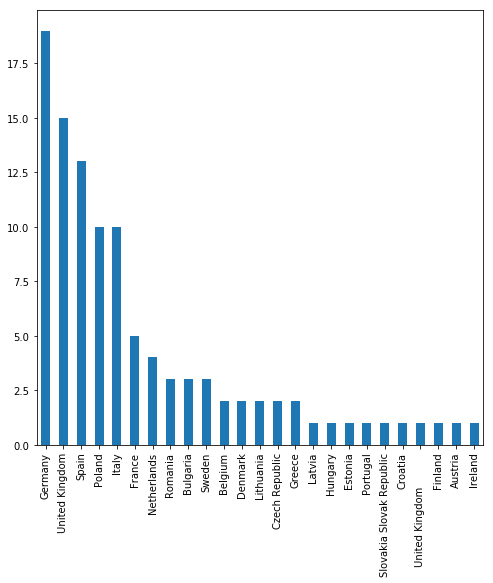

In [202]:
city_counts.plot(kind="bar")

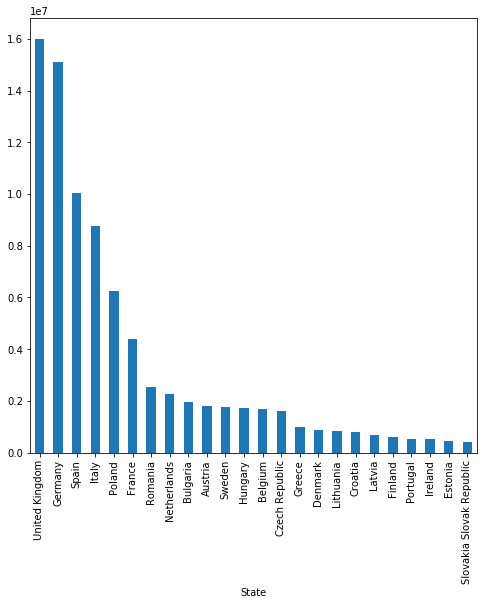

In [204]:
df_pop6.Population.plot(kind="bar")

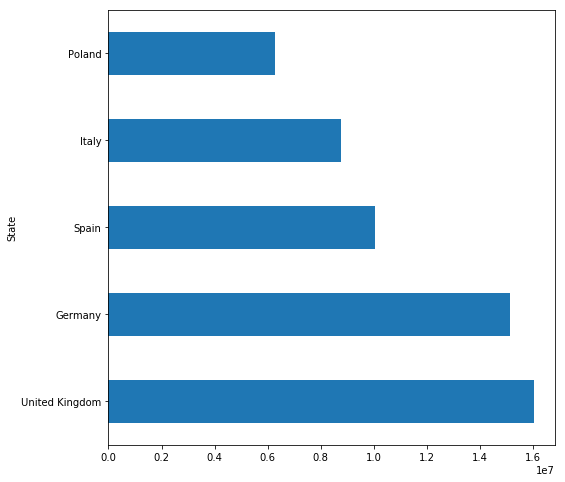

In [207]:
df_pop6.Population[:5].plot(kind="barh")

## Timeseries with pandas

International standard time notation: https://www.cl.cam.ac.uk/~mgk25/iso-time.html

ISO 8601 https://en.wikipedia.org/wiki/ISO_8601

UTC (Coordinated Universal Time)

year-month-day

24 hour clock

hour:minute:second.fraction

In [222]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', 
                 '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', 
                 '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', 
                 '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', 
                 '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877',
                 '2015-01-02 18:47:05.230071', '2015-01-02 18:47:05.280592', 
                 '2015-01-03 18:47:05.332662', '2015-01-03 18:47:05.385109', 
                 '2016-03-04 18:47:05.436523', '2016-03-04 18:47:05.486877',
                ], 
        'count': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41,42,21,52,14,15,26]}
df = pd.DataFrame(data, columns = ['date', 'count'])
df

,date,count
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
date     16 non-null object
count    16 non-null int64
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


In [224]:
df['date'] = pd.to_datetime(df['date'])

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
date     16 non-null datetime64[ns]
count    16 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 336.0 bytes


numpy.datetime64

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html

In [226]:
df

,date,count
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [227]:
df.index = df['date']

In [228]:
df

,date,count
date,,
2014-05-01 18:47:05.069722,2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,2014-05-04 18:47:05.436523,62


In [229]:
del df['date']
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [230]:
# all observations that occured in 2015
df['2015']

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [231]:
df['2014-05-04']

,count
date,
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [235]:
# all dates after 2015-01-01
df["2015/1/1":]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14
2016-03-04 18:47:05.436523,15
2016-03-04 18:47:05.486877,26


In [233]:
# one can also use the datetime package 
#https://docs.python.org/3/library/datetime.html
from datetime import datetime

In [236]:
df[datetime(2015, 1, 1):]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14
2016-03-04 18:47:05.436523,15
2016-03-04 18:47:05.486877,26


In [237]:
# observations between two dates
df['5/3/2014':'5/4/2014']

,count
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [238]:
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [240]:
# remove all observations made on some date and all following
df.truncate(after='5/3/2014')

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14


In [243]:
# observations on a certain date
df.loc['2014-05-01']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [244]:
df.loc['05/01/2014']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [245]:
# group by date
df.groupby(level=0).count()

,count
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1
2014-05-03 18:47:05.385109,1
2014-05-04 18:47:05.436523,1
2014-05-04 18:47:05.486877,1


In [246]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
df.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [248]:
df.resample('D').sum()

,count
date,
2014-05-01,59.0
2014-05-02,70.0
2014-05-03,51.0
2014-05-04,103.0
2014-05-05,NaN
2014-05-06,NaN
2014-05-07,NaN
2014-05-08,NaN
2014-05-09,NaN


In [250]:
df2 = df.resample('D').sum()

In [251]:
df2[pd.notnull(df2['count'])]

,count
date,
2014-05-01,59.0
2014-05-02,70.0
2014-05-03,51.0
2014-05-04,103.0
2015-01-02,63.0
2015-01-03,66.0
2016-03-04,41.0


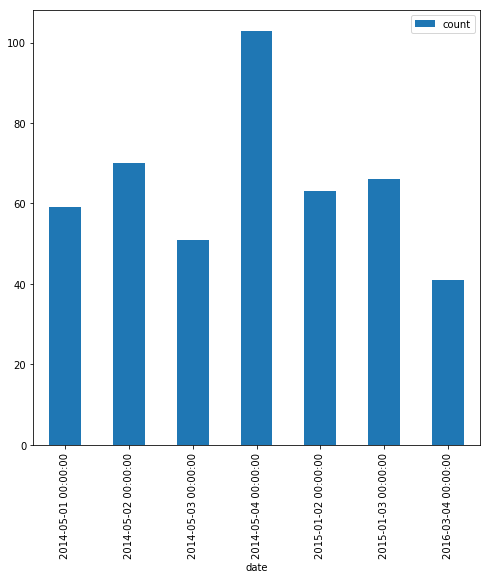

In [252]:
df2[pd.notnull(df2['count'])].plot(kind="bar")

## Time series data with a moderately large dataset (~50000 rows)

New lets look at two input files, each containing two columns: unicode time (time stince 1/1/1970) and the measured temperature (C)


these are tab separated lists, so we will need to set the delimeter  in read_csv with "\t":

In [2]:
!head -n 25 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000
1388533988	4.060000
1388534589	4.060000
1388535189	4.060000
1388535790	4.060000
1388536406	3.810000
1388537006	3.620000
1388537607	3.500000
1388538207	3.620000
1388538808	3.620000
1388539408	3.620000
1388540009	3.560000
1388540609	3.620000
1388541210	3.620000
1388541810	3.500000
1388542411	3.380000
1388543012	3.440000
1388543612	3.380000
1388544213	3.310000
1388544813	3.250000
1388545414	3.310000


In [3]:
!head -n 25 temperature_indoor_2014.tsv

1388530986	21.940000
1388531586	22.000000
1388532187	22.000000
1388532787	22.000000
1388533388	22.000000
1388533988	22.060000
1388534589	22.120000
1388535189	22.250000
1388535790	22.310000
1388536391	22.440000
1388536991	22.440000
1388537607	22.500000
1388538207	22.440000
1388538808	22.500000
1388539408	22.560000
1388540009	22.560000
1388540609	22.500000
1388541210	22.500000
1388541810	22.560000
1388542411	22.560000
1388543012	22.560000
1388543612	22.500000
1388544213	22.560000
1388544813	22.690000
1388545414	22.690000


In [6]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [7]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [8]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [9]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
time       49548 non-null int64
outdoor    49548 non-null float64
dtypes: float64(1), int64(1)
memory usage: 774.3 KB


In [11]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
time       49548 non-null datetime64[ns, Europe/Stockholm]
outdoor    49548 non-null float64
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [13]:
df1 = df1.set_index("time")

In [14]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [15]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [16]:
df2 = df2.set_index("time")

In [17]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [18]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [19]:
df1.index[0:4]

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', freq=None)

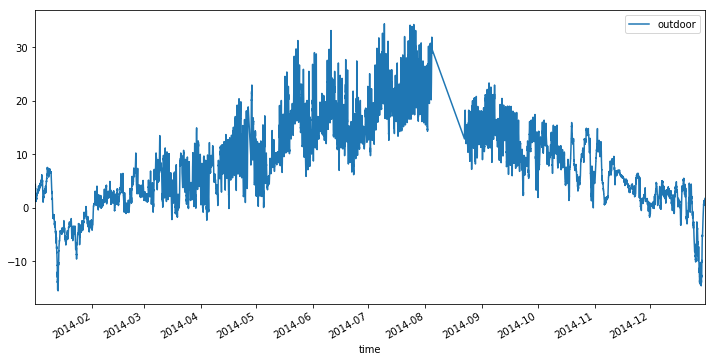

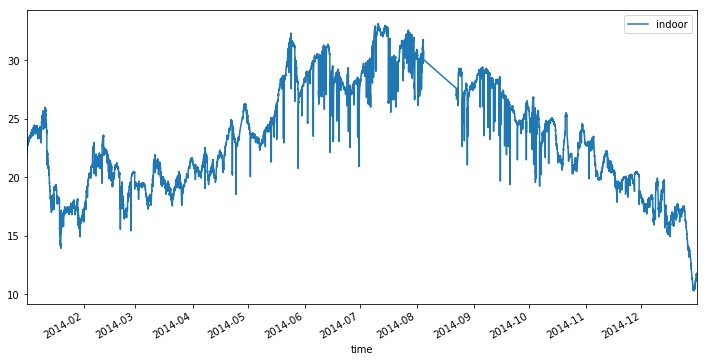

In [21]:
plt.rcParams['figure.figsize'] = 12, 6
df1.plot()
df2.plot()

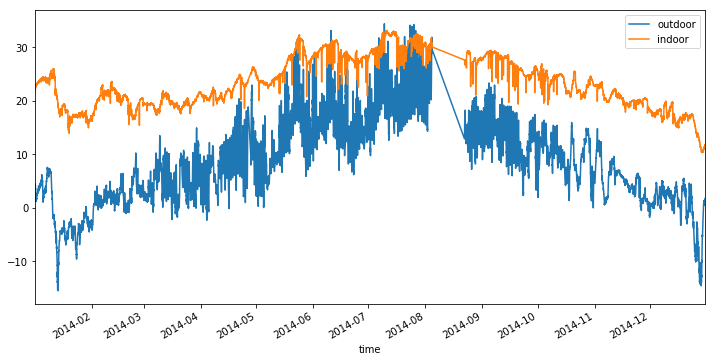

In [277]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

In [279]:
# Since we have a time series index we can select subsets of the data (returns a boolean array)
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [278]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [280]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [281]:
# we couild instead selecdt a subset of the data with slicing syntax
df2_jan = df2["2014-1-1":"2014-1-31"]

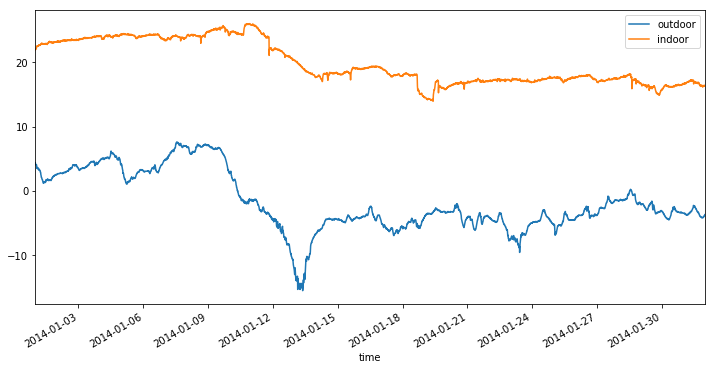

In [283]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1_jan.plot()
df2_jan.plot(ax=ax)

In [57]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [72]:
# convert an index back into a column so that we can use the apply function on the column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
df1_month = df1.reset_index()

In [73]:
df1_month.head()

,time,outdoor
0,2014-01-01 00:03:06+01:00,4.38
1,2014-01-01 00:13:06+01:00,4.25
2,2014-01-01 00:23:07+01:00,4.19
3,2014-01-01 00:33:07+01:00,4.06
4,2014-01-01 00:43:08+01:00,4.06


In [74]:
df1_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
time       49548 non-null datetime64[ns, Europe/Stockholm]
outdoor    49548 non-null float64
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [75]:
df1_month.loc[0,"time"]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [76]:
# use the datetime64 attribute month
df1_month.loc[0,"time"].month

1

In [77]:
df1_month.loc[0,"time"].minute

3

In [78]:
df1_month.loc[0,"time"].minute

3

In [79]:
# add a new column containting the month for each row
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [80]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [81]:
df1_month.tail()

,time,outdoor,month
49543,2014-12-30 23:16:33+01:00,1.56,12
49544,2014-12-30 23:26:33+01:00,1.62,12
49545,2014-12-30 23:36:34+01:00,1.62,12
49546,2014-12-30 23:46:35+01:00,1.62,12
49547,2014-12-30 23:56:35+01:00,1.75,12


Group rows based on the column "month" and calculate a funciton on each group

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

In [88]:
df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)

In [89]:
df1_month_group_agg.head(10)

,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [91]:
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)

In [92]:
df2_month_group_agg.head(10)

,indoor
month,
1,19.862590
2,20.231507
3,19.597748
4,22.149754
5,26.332160
6,28.687491
7,30.605333
8,28.099068
9,26.950366


In [93]:
# Join two data frames (create one dataframe with columns from both df1 and df2)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
df_month = df1_month_group_agg.join(df2_month_group_agg)

In [94]:
df_month.head(10)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748
4,8.105193,22.149754
5,12.261396,26.332160
6,15.586955,28.687491
7,20.780314,30.605333
8,16.494823,28.099068
9,12.823905,26.950366


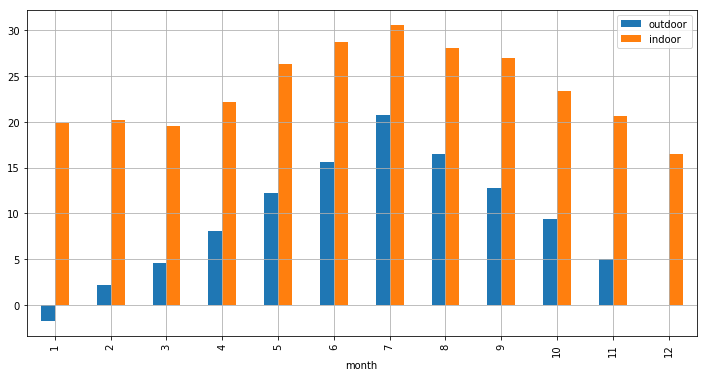

In [101]:
df_month.plot(kind='bar', grid=True)

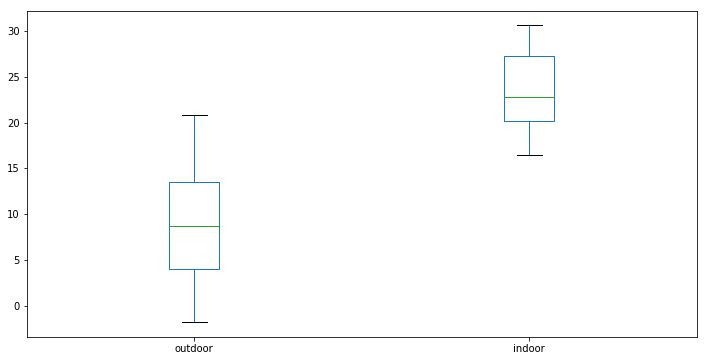

In [296]:
df_month.plot(kind='box')

In [297]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


### resampling

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html



In [102]:
df1_hour = df1.resample("H").mean()

In [103]:
df1_day = df1.resample("D").mean()

In [104]:
df1_week = df1.resample("7D").mean()

In [106]:
df1_month = df1.resample("M").mean()

In [107]:
df1_month

,outdoor
time,
2014-01-31 00:00:00+01:00,-1.776646
2014-02-28 00:00:00+01:00,2.231613
2014-03-31 00:00:00+02:00,4.615437
2014-04-30 00:00:00+02:00,8.105193
2014-05-31 00:00:00+02:00,12.261396
2014-06-30 00:00:00+02:00,15.586955
2014-07-31 00:00:00+02:00,20.780314
2014-08-31 00:00:00+02:00,16.494823
2014-09-30 00:00:00+02:00,12.823905


In [115]:
df_diff_week = (df1.resample("W").outdoor.mean() - df2.resample("W").indoor.mean())
df_diff_day  = (df1.resample("D").outdoor.mean() - df2.resample("D").indoor.mean())

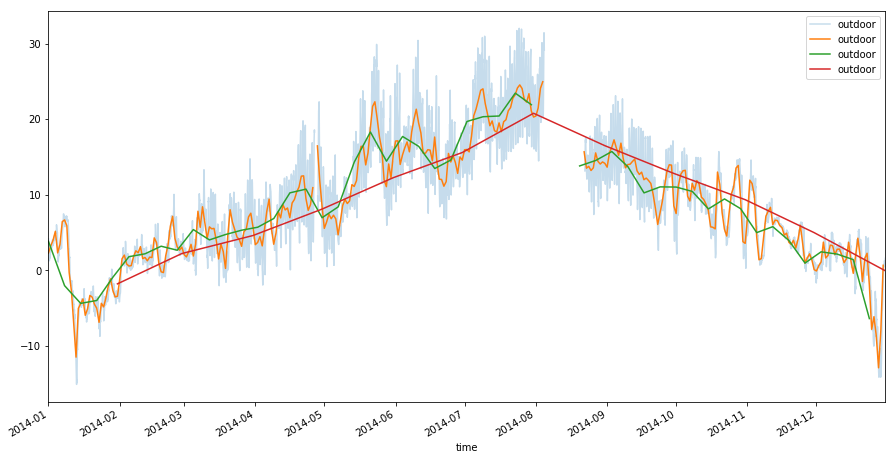

In [111]:
plt.rcParams['figure.figsize'] = 15, 8
ax = df1_hour.plot(alpha=0.25)
df1_day.plot(ax=ax)
df1_week.plot(ax=ax)
df1_month.plot(ax=ax)

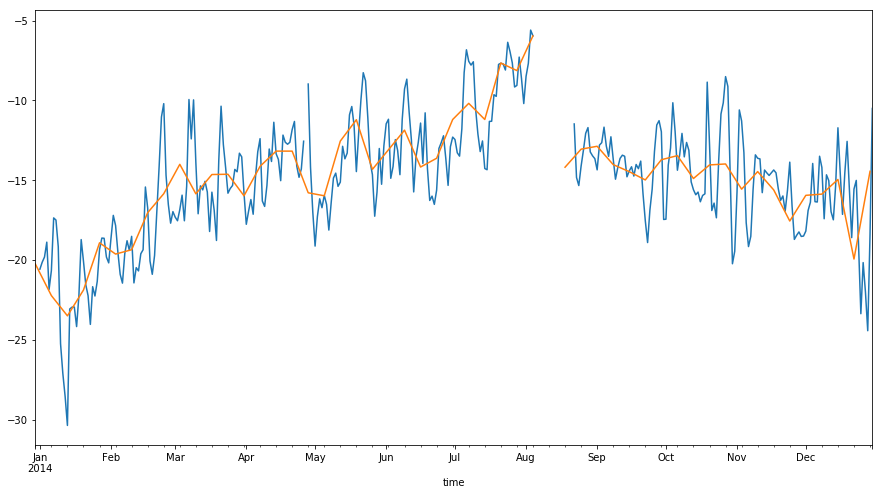

In [116]:
ax2 = df_diff_day.plot()
df_diff_week.plot(ax=ax2)

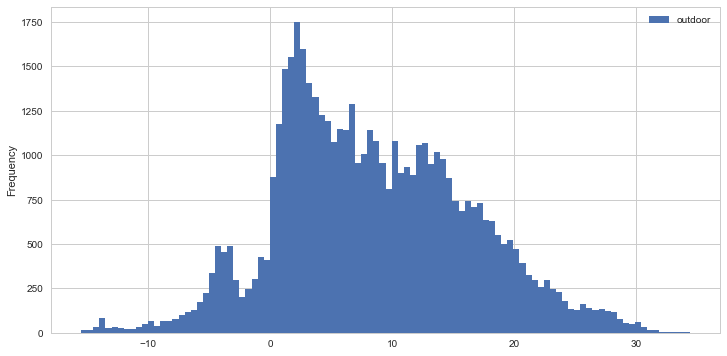

In [141]:
df1.plot.hist(bins=100)

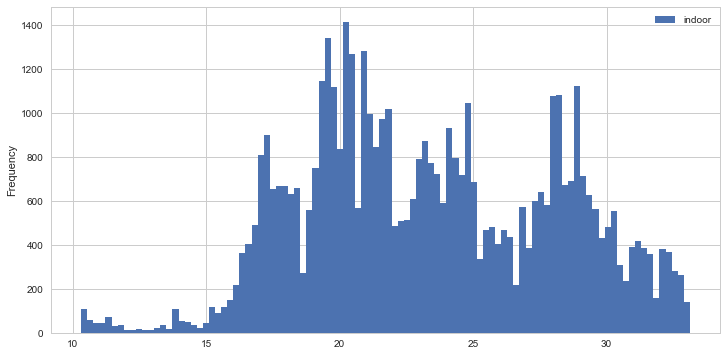

In [142]:
df2.plot.hist(bins=100)

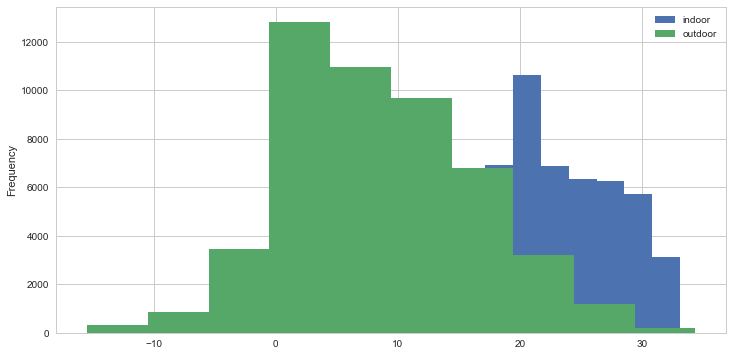

In [144]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df2.plot.hist()
df1.plot.hist(ax=ax)

# Seaborn

Graphics library built on top of Matplotlib.
   * Provides additional plotting and statistical tools
   * Extra emphasis on aesthetics (industry style not science journal style) and readability

In [118]:
bbb

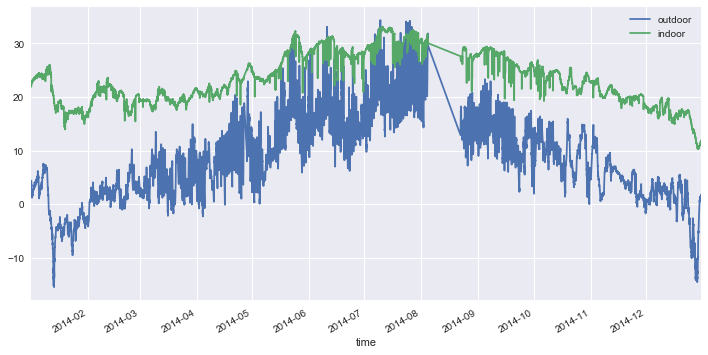

In [120]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

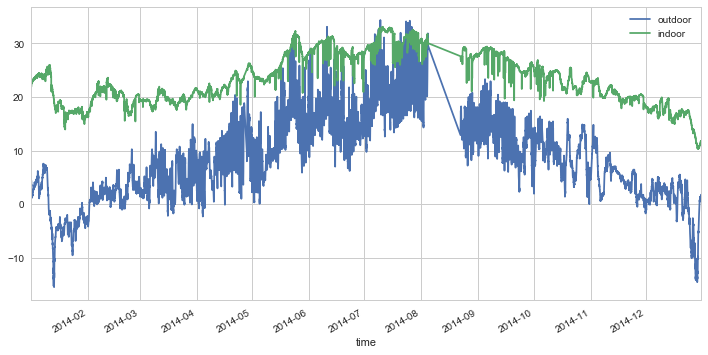

In [123]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

In [126]:
df1.resample("10min")
df2.resample("10min")

DatetimeIndexResampler [freq=<10 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

In [129]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [127]:
df_temp = pd.concat([df1,df2],axis=1)

In [128]:
df_temp.head()

,outdoor,indoor
time,,
2014-01-01 00:03:06+01:00,4.38,21.94
2014-01-01 00:13:06+01:00,4.25,22.00
2014-01-01 00:23:07+01:00,4.19,22.00
2014-01-01 00:33:07+01:00,4.06,22.00
2014-01-01 00:43:08+01:00,4.06,22.00


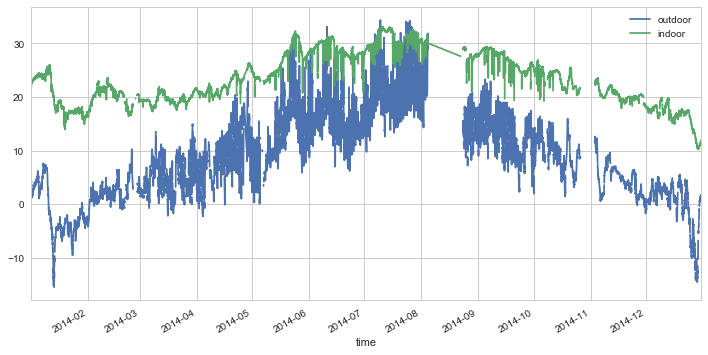

In [130]:
df_temp.plot()

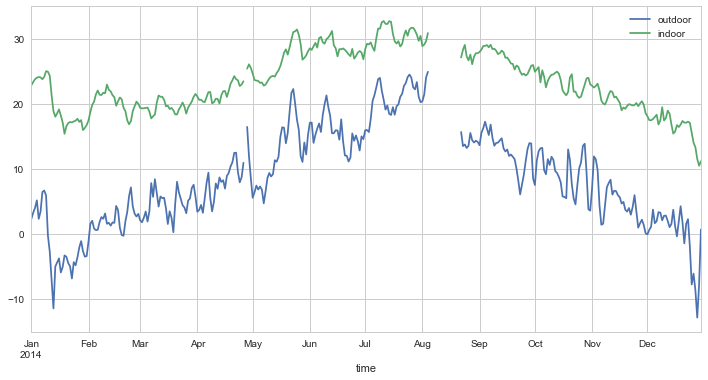

In [134]:
df_temp.resample("D").mean().plot()

Seaborn built-in statstical plotting tools

kdeplot - kernel destinay estimation

distplot - histogram

In [139]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values(),bines=50)

TypeError: 'numpy.ndarray' object is not callable

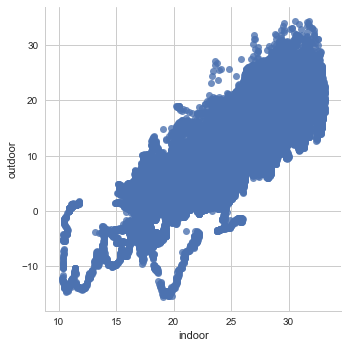

In [147]:
plt.rcParams['figure.figsize'] = 10, 8
sns.lmplot('indoor', 'outdoor', data=df_temp, fit_reg=False)